In [3001]:
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [3002]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [3003]:
import os
os.listdir()

['.ipynb_checkpoints',
 '.~lock.Problem Statement.odt#',
 'data',
 'Data Dictionary.odt',
 'Logistic_Bank.ipynb',
 'model_logistic_regressor.joblib',
 'Problem Statement.pdf',
 '~$ta Dictionary.odt']

In [3004]:
# Read the dataset

bank = pd.read_csv('data/Bank-additional-full.csv', sep=';')

In [3005]:
# Look at the first few entries

bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3006]:
# Look at the last few entries

bank.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [3007]:
# Inspect the shape of the dataset

bank.shape

(41188, 21)

In [3008]:
# Inspect the different columsn in the dataset

bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [3009]:
# Check the info to see the types of the feature variables and the null values present

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [3010]:
# Check the summary of the dataset

bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [3011]:
bank.describe(include = np.object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Exploration Data Analysis

In [3012]:
bank['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

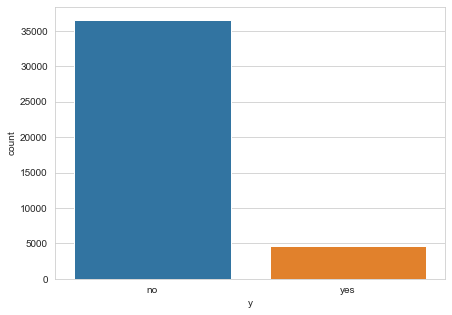

In [3014]:
plt.figure(figsize=(7,5))
sns.countplot(x='y', data=bank)
plt.savefig('target_counts.jpg')

* Data is imbalanced. 
* Outcome No has more constraints than yes

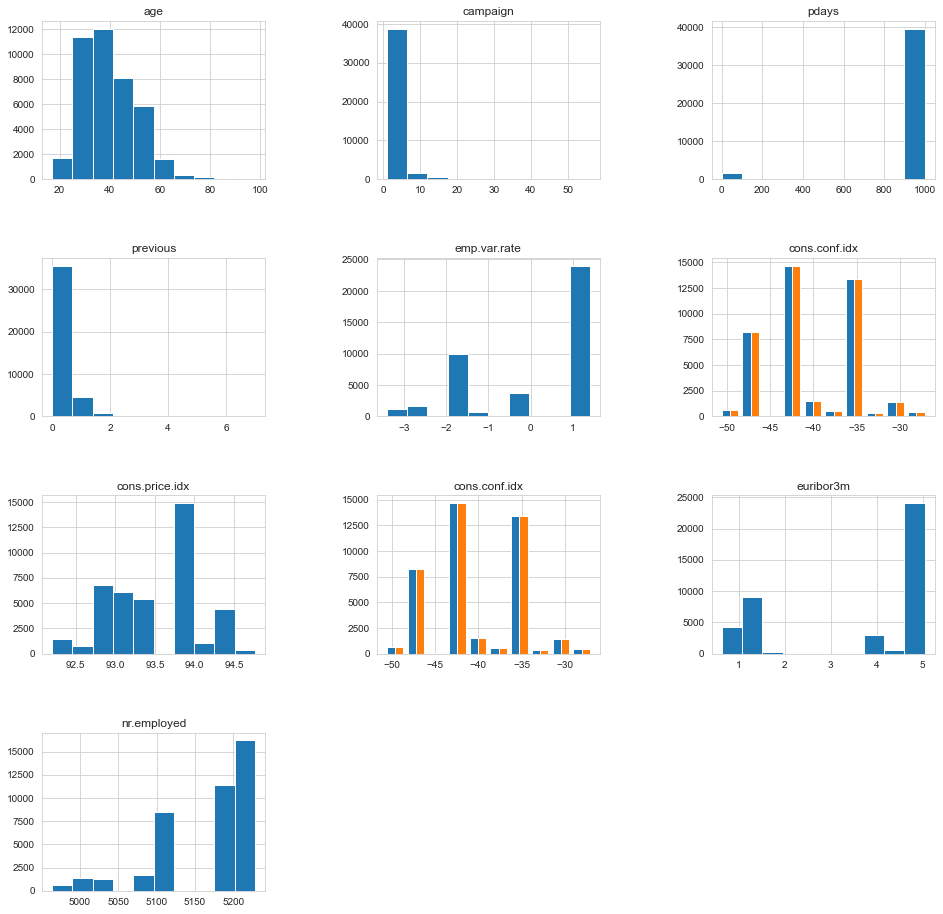

In [3015]:
header = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.conf.idx','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
bank.hist(column=header, figsize=(16,16))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.savefig('numeric_features_count.jpg')

* Above sub graphs are plotted to check any imbalances in the data.
* Pdays data is imbalance and the difference between the values is huge rather than other data

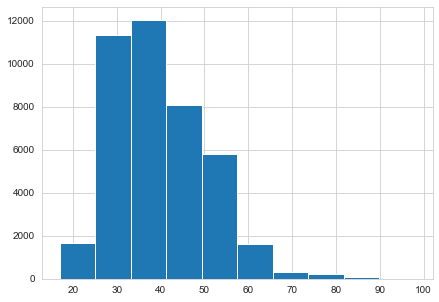

In [3016]:
plt.figure(figsize=(7,5))
plt.hist(x='age', data=bank, bins=10)
sns.set_style('whitegrid')
plt.savefig('age_count.jpg')

* Number of counts are more on the age 30 and 40

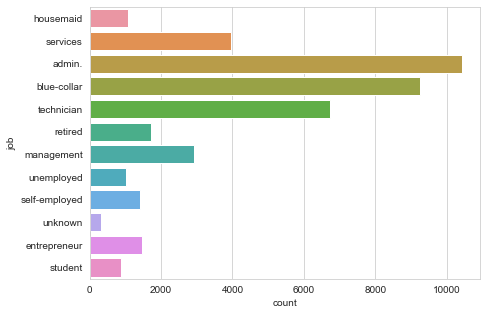

In [3017]:
plt.figure(figsize=(7,5))
sns.countplot(y='job', data=bank)
plt.savefig('job_count.jpg')

* admin, blue-collar, technician has the highest counts in the job feature

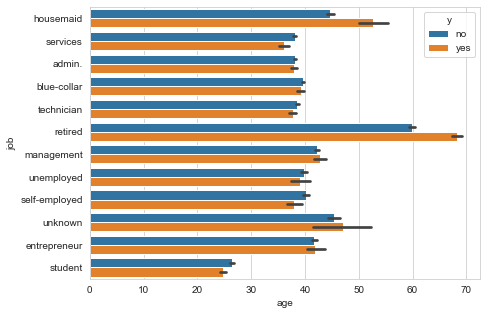

In [3018]:
plt.figure(figsize=(7,5))
sns.barplot(y='job', x='age', data=bank, hue='y')
sns.set_style('whitegrid')
plt.savefig('job-age_target_count.jpg')

* Retired people have said yes to Bank term deposit

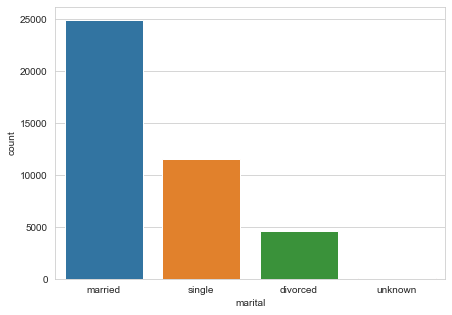

In [3019]:
plt.figure(figsize=(7,5))
sns.countplot(x='marital', data=bank)
plt.savefig('marital_count.jpg')

* Married has the highest counts in the marital feature

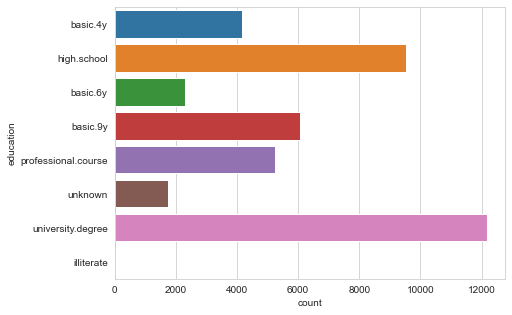

In [3020]:
plt.figure(figsize=(7,5))
sns.countplot(y='education', data=bank)
plt.savefig('education_count.jpg')

* Most of the people are educated, few people are unknown
* university.degree has the highjest count of all the others

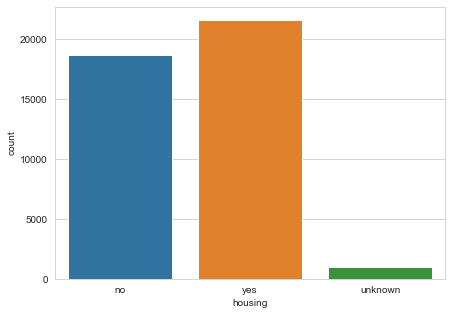

In [3021]:
plt.figure(figsize=(7,5))
sns.countplot(x='housing',data=bank)
plt.savefig('housing_count.jpg')

* about 50% of the people are having the house loan
* about 45% of the people do not have the huse loan and 5% of them are unknown

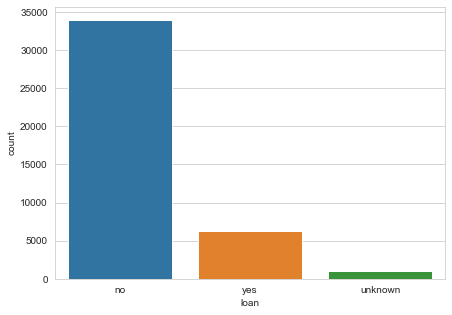

In [3023]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan', data=bank)
plt.savefig('loan_count.jpg')

* Most of the people do not have personal loan
* less people hs the personal loan and few are unknown

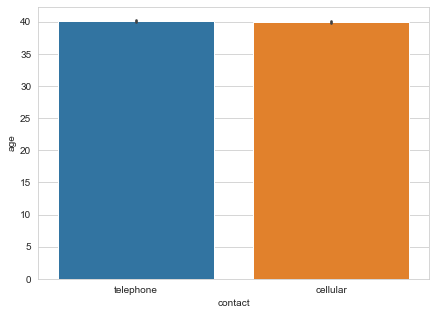

In [3024]:
plt.figure(figsize=(7,5))
sns.barplot(y='age', x='contact',data = bank)
plt.savefig('contact_count.jpg')

* type of the contact is equal for both telephone and cellular

**The distribution of duration and campaign**

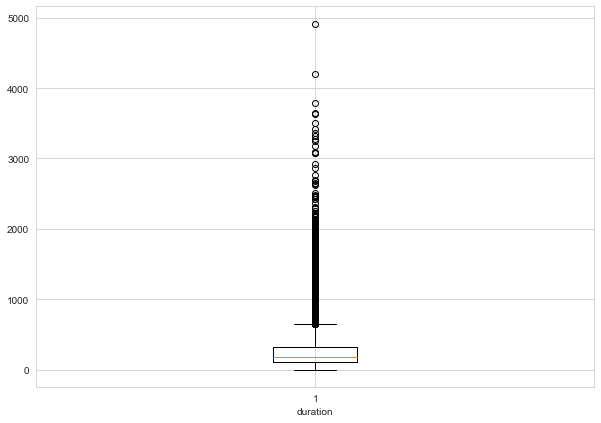

<Figure size 432x288 with 0 Axes>

In [3025]:
plt.figure(figsize =(10, 7))
plt.boxplot('duration', data=bank)
plt.xlabel('duration')
plt.show()
plt.savefig('duration_box_plot.jpg')

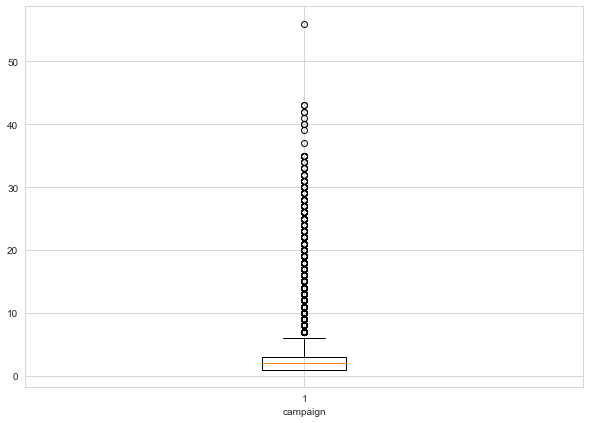

<Figure size 432x288 with 0 Axes>

In [3026]:
plt.figure(figsize =(10, 7))
plt.boxplot('campaign', data=bank)
plt.xlabel('campaign')
plt.show()
plt.savefig('campaign_box_plot.jpg')

In [3027]:
# Create Questions and solve them

**Checking correlation with the independent variables**

In [3028]:
corr=bank.corr()

In [3029]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


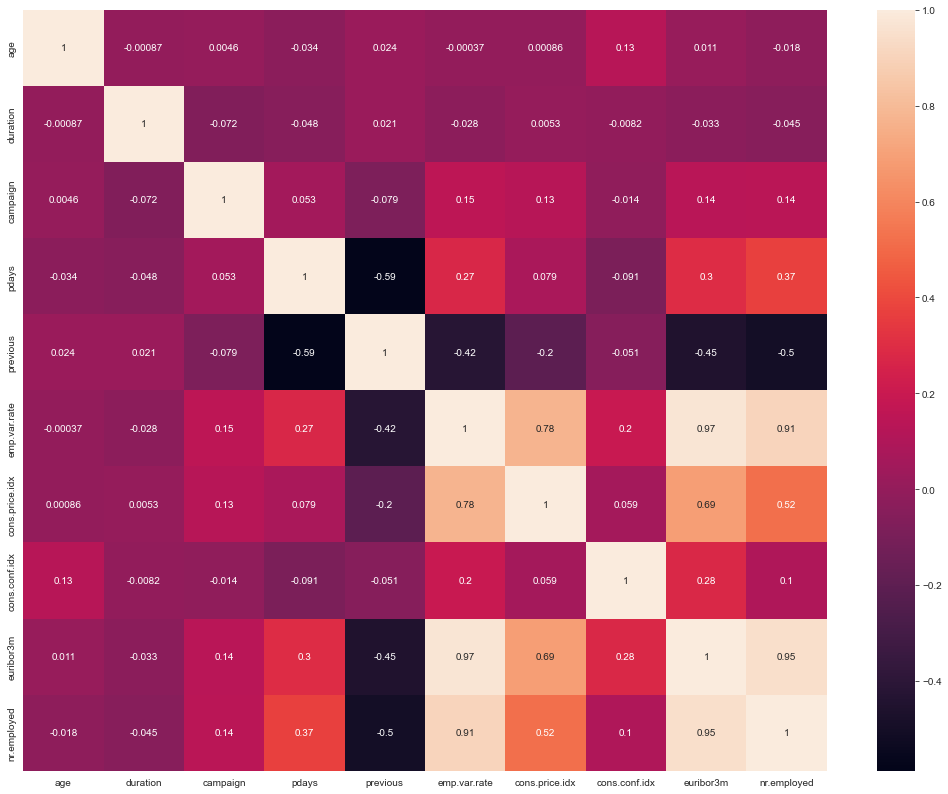

In [3030]:
plt.figure(figsize=(18,14))
sns.heatmap(bank.corr(), annot=True)
plt.savefig('heatmap.jpg')

In [3031]:
#emp.var.rate ,  pdays, - cons.price.idx
#nr.employed,emp.var.rate,  
#euribor3m , emp.var.rate , 

In [3032]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Checking the count of missing values**

In [3033]:
# Get the value counts of all the columns

for column in bank:
    print(bank[column].astype('category').value_counts())
    print('___________________________________________________')

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
91       2
98       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
___________________________________________________
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
___________________________________________________
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
___________________________________________________
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
_________________________

In [3034]:
#Calculating the percentage of unknown values in the columns

print('marital :\n',(bank['marital']=='unknown').value_counts() / 41188 *100)
print('education :\n',(bank['education']=='unknown').value_counts() / 41188 *100)
print('default :\n',(bank['default']=='unknown').value_counts() / 41188 *100)
print('housing :\n',(bank['housing']=='unknown').value_counts() / 41188 *100)
print('loan :\n',(bank['loan']=='unknown').value_counts() / 41188 *100)

marital :
 False    99.805769
True      0.194231
Name: marital, dtype: float64
education :
 False    95.79732
True      4.20268
Name: education, dtype: float64
default :
 False    79.127416
True     20.872584
Name: default, dtype: float64
housing :
 False    97.596387
True      2.403613
Name: housing, dtype: float64
loan :
 False    97.596387
True      2.403613
Name: loan, dtype: float64


In [3035]:
# replacing unknown values to np.nan values

bank.loc[bank['job'] == 'unknown', 'job'] = np.nan
bank.loc[bank['marital'] == 'unknown', 'marital'] = np.nan
bank.loc[bank['education'] == 'unknown', 'education'] = np.nan
bank.loc[bank['housing'] == 'unknown', 'housing'] = np.nan
bank.loc[bank['loan'] == 'unknown', 'loan'] = np.nan
bank.loc[bank['contact'] == 'unknown', 'contact'] = np.nan

In [3036]:
#col = ['job','marital','education','housing','loan','']
#for cols in col:
 #   bank.replace(to_replace =np.nan, value ="unknocontactwn")
#bank[col] = bank[col]

#bank.loc[bank['job'] == 'unknown', 'job'] = np.nan

In [3037]:
bank.isnull().sum() 

age                  0
job                330
marital             80
education         1731
default              0
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [3038]:
bank = bank.drop('default', axis=1)

* dropping the column default, as we noticed that when we got the value counts this column, in which three values were majorly present for all the data points and 20% of the data is missing.

In [3039]:
# Drop the null value rows in the column 'job'

bank = bank[~pd.isnull(bank['job'])]

In [3040]:
# Drop the null value rows in the column 'marital'

bank = bank[~pd.isnull(bank['marital'])]

In [3041]:
# Drop the null value rows in the column 'education'

bank = bank[~pd.isnull(bank['education'])]

In [3042]:
# Drop the null value rows in the column 'housing'

bank = bank[~pd.isnull(bank['housing'])] 

In [3043]:
# Drop the null value rows in the column 'loan'

bank = bank[~pd.isnull(bank['loan'])] 

In [3044]:
# Drop the null value rows in the column 'contact'

bank = bank[~pd.isnull(bank['contact'])] 

In [3045]:
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()     # set of all the names of correlated columns
    corr_matrix = bank.corr()    # assigning dataframe
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  # we are interested in absolute coeff value(negatively correlated)
                colname = corr_matrix.columns[i]      # getting the names of column
                col_corr.add(colname)
    return col_corr

In [3046]:
# setting the threshold value to 70%

corr_features = correlation(bank, 0.7)
len(set(corr_features))

3

In [3047]:
corr_features

{'cons.price.idx', 'euribor3m', 'nr.employed'}

In [3048]:
# With the above correlation we can choose to drop the columns - 'cons.price.idx', 'euribor3m', 'nr.employed'
bank = bank.drop('cons.price.idx', axis=1)
bank = bank.drop('euribor3m', axis=1)
bank.drop('nr.employed', axis=1, inplace=True)

In [3049]:
bank.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.conf.idx,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,-36.4,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,-36.4,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,-36.4,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,-36.4,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,-36.4,no


In [3050]:
# Check the number of missing values in each column

bank.isnull().sum() 

age              0
job              0
marital          0
education        0
housing          0
loan             0
contact          0
month            0
day_of_week      0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
y                0
dtype: int64

In [3051]:
print(len(bank.index))
print(len(bank.index)/41188 * 100) 

38245
92.85471496552394


We still have around 92% of the rows which seems good enough.

### Dummy variable creation

The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [3052]:
# Check the columns which are of type 'object'

temp = bank.loc[:, bank.dtypes == 'object']
temp.columns

Index(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [3053]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(bank[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month','day_of_week', 'poutcome']], drop_first=True)

# Add the results to the master dataframe
bank = pd.concat([bank, dummy], axis=1)

In [3054]:
bank['y'].value_counts()

no     33987
yes     4258
Name: y, dtype: int64

In [3055]:
# Drop the variables for which the dummy variables have been created

bank = bank.drop(['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
       'day_of_week', 'poutcome'], 1)

In [3056]:
#Applying label encoding on 'y' variable as it has binary values and is target variable
# drop that level by specifying it explicitly

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
bank['y'] = lb.fit_transform(bank['y'])

In [3057]:
bank['y'].value_counts()

0    33987
1     4258
Name: y, dtype: int64

In [3058]:
bank.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0


### Test-Train Split

The next step is to split the dataset into training an testing sets.

In [3059]:
# Import the required library

from sklearn.model_selection import train_test_split

In [3060]:
# Put all the feature variables in X

X = bank.drop(['y'], 1)
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,-36.4,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,-36.4,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [3061]:
# Put the target variable in y

y = bank['y']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32

In [3062]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [3063]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [3064]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['age', 'pdays','campaign','previous','emp.var.rate','duration','cons.conf.idx']] = scaler.fit_transform(X_train[['age', 'pdays','campaign','previous','emp.var.rate','duration','cons.conf.idx']])

X_train.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
17301,0.098765,0.023180,0.095238,1.0,0.000000,1.0000,0.338912,0,0,0,...,0,0,0,0,0,0,0,0,1,0
26425,0.407407,0.045140,0.000000,1.0,0.000000,0.6875,0.368201,0,0,0,...,0,1,0,0,0,1,0,0,1,0
38271,0.111111,0.015250,0.023810,1.0,0.142857,0.0000,1.000000,0,0,0,...,0,0,1,0,0,0,1,0,0,0
24709,0.382716,0.061204,0.000000,1.0,0.000000,0.6875,0.368201,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2160,0.148148,0.023383,0.000000,1.0,0.000000,0.9375,0.602510,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [3065]:
bank.shape

(38245, 44)

## Step 2: Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [3066]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [3067]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=6)            # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [3068]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', False, 26),
 ('duration', True, 1),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', False, 3),
 ('emp.var.rate', True, 1),
 ('cons.conf.idx', False, 37),
 ('job_blue-collar', False, 12),
 ('job_entrepreneur', False, 21),
 ('job_housemaid', False, 32),
 ('job_management', False, 28),
 ('job_retired', False, 13),
 ('job_self-employed', False, 23),
 ('job_services', False, 20),
 ('job_student', False, 14),
 ('job_technician', False, 36),
 ('job_unemployed', False, 29),
 ('marital_married', False, 38),
 ('marital_single', False, 27),
 ('education_basic.6y', False, 35),
 ('education_basic.9y', False, 30),
 ('education_high.school', False, 19),
 ('education_illiterate', False, 7),
 ('education_professional.course', False, 18),
 ('education_university.degree', False, 17),
 ('housing_yes', False, 31),
 ('loan_yes', False, 25),
 ('contact_telephone', False, 24),
 ('month_aug', False, 10),
 ('month_dec', False, 9),
 ('month_jul', False, 8),
 ('month_jun', False, 11),
 ('month

In [3069]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

Now we have all the variables selected by RFE and since we care about the statistics part, i.e. the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [3070]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [3071]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3072]:
# Import statsmodels

import statsmodels.api as sm

In [3073]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                30596
Model:                            GLM   Df Residuals:                    30589
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6670.2
Date:                Sun, 14 Nov 2021   Deviance:                       13340.
Time:                        23:35:36   Pearson chi2:                 2.29e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2357
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2125      0.075      2.833      0.005       0.065       0.360
duration        23.0581      0.417     55.352      0.000      22.242      23.875
campaign        -1.7048      0.546     -3.120      0.002      -2.776      -0.634
pdays           -1.9847      0.077    -25.937      0.000      -2.135      -1.835
emp.var.rate    -2.9770      0.074    -40.312      0.000      -3.122      -2.832
month_mar        1.5936      0.116     13.771      0.000       1.367       1.820
month_may       -1.0554      0.055    -19.075      0.000      -1.164      -0.947
================================================================================
"""

There are no variables which have a p-value greater than `0.05`. So, we can ignore them. But first, let's also look at the VIFs.

In [3074]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3075]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,pdays,8.31
3,emp.var.rate,6.58
0,duration,1.91
5,month_may,1.55
1,campaign,1.35
4,month_mar,1.03


VIFs seem to be in a decent range except for two variables. 

In [3076]:
X_train.drop('emp.var.rate', axis = 1, inplace = True)

In [3077]:
X_train.drop('pdays', axis = 1, inplace = True)

In [3078]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                30596
Model:                            GLM   Df Residuals:                    30591
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8403.4
Date:                Sun, 14 Nov 2021   Deviance:                       16807.
Time:                        23:35:37   Pearson chi2:                 1.32e+07
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1440
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0280      0.037    -81.366      0.000      -3.101      -2.955
duration      19.4193      0.354     54.828      0.000      18.725      20.113
campaign      -6.0390      0.529    -11.411      0.000      -7.076      -5.002
month_mar      2.3627      0.109     21.718      0.000       2.149       2.576
month_may     -0.9570      0.051    -18.782      0.000      -1.057      -0.857
==============================================================================
"""

In [3079]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,duration,1.28
3,month_may,1.24
1,campaign,1.13
2,month_mar,1.01


## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [3080]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

17301    0.040975
26425    0.104204
38271    0.053373
24709    0.137120
2160     0.028446
20412    0.071361
40382    0.093319
1990     0.021045
17001    0.107255
15364    0.076217
dtype: float64

In [3081]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.04097501, 0.10420429, 0.05337345, 0.13712004, 0.02844636,
       0.07136136, 0.09331908, 0.02104488, 0.10725475, 0.07621732])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [3082]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final.head()

,y,y_Prob
0,0,0.040975
1,0,0.104204
2,0,0.053373
3,0,0.137120
4,0,0.028446


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [3083]:
y_train_pred_final['Predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,y,y_Prob,Predicted
0,0,0.040975,0
1,0,0.104204,0
2,0,0.053373,0
3,0,0.137120,0
4,0,0.028446,0


Now that you have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [3084]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [3085]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.Predicted )
print(confusion)

[[26670   474]
 [ 2697   755]]


In [3086]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.Predicted))

0.8963590011766244


In [3087]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [3088]:
# Calculate the sensitivity

TP/(TP+FN)

0.21871378910776362

In [3089]:
# Calculate the specificity

TN/(TN+FP)

0.9825375773651636

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, we need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [3090]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [3091]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

In [3092]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

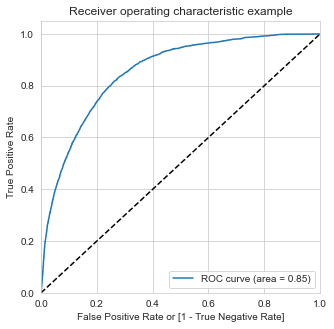

In [3093]:
# Call the ROC function

draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)

The area under the curve of the ROC is 0.76 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [3094]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.040975,0,1,0,0,0,0,0,0,0,0,0
1,0,0.104204,0,1,1,0,0,0,0,0,0,0,0
2,0,0.053373,0,1,0,0,0,0,0,0,0,0,0
3,0,0.137120,0,1,1,0,0,0,0,0,0,0,0
4,0,0.028446,0,1,0,0,0,0,0,0,0,0,0


In [3095]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.112825  1.000000  0.000000
0.1   0.1  0.780429  0.764484  0.782457
0.2   0.2  0.873055  0.485516  0.922340
0.3   0.3  0.889691  0.369061  0.955902
0.4   0.4  0.895084  0.287949  0.972296
0.5   0.5  0.896359  0.218714  0.982538
0.6   0.6  0.894692  0.151796  0.989169
0.7   0.7  0.891947  0.104577  0.992079
0.8   0.8  0.889953  0.064600  0.994916
0.9   0.9  0.888776  0.034762  0.997384


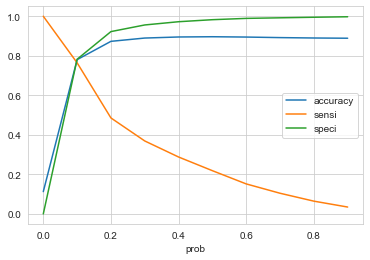

In [3096]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.16, you get the optimal values of the three metrics. So let's choose 0.16 as our cutoff now.

In [3097]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.16 else 0)

y_train_pred_final.head()

,y,y_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.040975,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.104204,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.053373,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.137120,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.028446,0,1,0,0,0,0,0,0,0,0,0,0


In [3098]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.8552425153614852

In [3099]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[24208,  2936],
       [ 1493,  1959]], dtype=int64)

In [3100]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [3101]:
# Calculate Sensitivity

TP/(TP+FN)

0.5674971031286211

In [3102]:
# Calculate Specificity

TN/(TN+FP)

0.8918361332154435

In [3103]:
# Save model for future use

import joblib
joblib.dump(rfe, 'model_logistic_regressor.joblib')

['model_logistic_regressor.joblib']